## skip-gram모델 구현

In [1]:
# coding: utf-8
import sys
sys.path.append('..')
import numpy as np
from common.layers import MatMul, SoftmaxWithLoss


class SimpleSkipGram:
    def __init__(self, vocab_size, hidden_size):
        V, H = vocab_size, hidden_size

        # 가중치 초기화
        W_in = 0.01 * np.random.randn(V, H).astype('f')
        W_out = 0.01 * np.random.randn(H, V).astype('f')

        # 계층 생성
        self.in_layer = MatMul(W_in)
        self.out_layer = MatMul(W_out)
        self.loss_layer1 = SoftmaxWithLoss()
        self.loss_layer2 = SoftmaxWithLoss()

        # 모든 가중치와 기울기를 리스트에 모은다.
        layers = [self.in_layer, self.out_layer]
        self.params, self.grads = [], []
        for layer in layers:
            self.params += layer.params
            self.grads += layer.grads

        # 인스턴스 변수에 단어의 분산 표현을 저장한다.
        self.word_vecs = W_in

    def forward(self, contexts, target):
        h = self.in_layer.forward(target)
        s = self.out_layer.forward(h)
        l1 = self.loss_layer1.forward(s, contexts[:, 0])
        l2 = self.loss_layer2.forward(s, contexts[:, 1])
        loss = l1 + l2
        return loss

    def backward(self, dout=1):
        dl1 = self.loss_layer1.backward(dout)
        dl2 = self.loss_layer2.backward(dout)
        ds = dl1 + dl2
        dh = self.out_layer.backward(ds)
        self.in_layer.backward(dh)
        return None


### 학습 코드 구현

| 에폭 1 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 2 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 3 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 4 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 5 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 6 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 7 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 8 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 9 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 10 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 11 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 12 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 13 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 14 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 15 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 16 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 17 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 18 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 19 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 20 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 21 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 22 |  반복 1 / 2 | 시간 0[s] | 손실 3.88
| 에폭 23 |  반복 1 / 2 | 시간 0[s] | 손실 3.88
| 에폭 24 |  반복 1 / 2 | 시간 0[s] | 손실 3.88
| 에폭 25 |  반복 1 / 2 | 시간 0[s] | 손실 3.88
| 에폭 26 |

| 에폭 307 |  반복 1 / 2 | 시간 0[s] | 손실 2.51
| 에폭 308 |  반복 1 / 2 | 시간 0[s] | 손실 2.18
| 에폭 309 |  반복 1 / 2 | 시간 0[s] | 손실 2.21
| 에폭 310 |  반복 1 / 2 | 시간 0[s] | 손실 2.47
| 에폭 311 |  반복 1 / 2 | 시간 0[s] | 손실 2.38
| 에폭 312 |  반복 1 / 2 | 시간 0[s] | 손실 2.26
| 에폭 313 |  반복 1 / 2 | 시간 0[s] | 손실 2.39
| 에폭 314 |  반복 1 / 2 | 시간 0[s] | 손실 2.31
| 에폭 315 |  반복 1 / 2 | 시간 0[s] | 손실 2.29
| 에폭 316 |  반복 1 / 2 | 시간 0[s] | 손실 2.35
| 에폭 317 |  반복 1 / 2 | 시간 0[s] | 손실 2.31
| 에폭 318 |  반복 1 / 2 | 시간 0[s] | 손실 2.13
| 에폭 319 |  반복 1 / 2 | 시간 0[s] | 손실 2.68
| 에폭 320 |  반복 1 / 2 | 시간 0[s] | 손실 1.93
| 에폭 321 |  반복 1 / 2 | 시간 0[s] | 손실 2.68
| 에폭 322 |  반복 1 / 2 | 시간 0[s] | 손실 2.25
| 에폭 323 |  반복 1 / 2 | 시간 0[s] | 손실 2.30
| 에폭 324 |  반복 1 / 2 | 시간 0[s] | 손실 2.12
| 에폭 325 |  반복 1 / 2 | 시간 0[s] | 손실 2.29
| 에폭 326 |  반복 1 / 2 | 시간 0[s] | 손실 2.46
| 에폭 327 |  반복 1 / 2 | 시간 0[s] | 손실 2.28
| 에폭 328 |  반복 1 / 2 | 시간 0[s] | 손실 2.11
| 에폭 329 |  반복 1 / 2 | 시간 0[s] | 손실 2.33
| 에폭 330 |  반복 1 / 2 | 시간 0[s] | 손실 2.40
| 에폭 331 |  반복 1

| 에폭 533 |  반복 1 / 2 | 시간 0[s] | 손실 2.23
| 에폭 534 |  반복 1 / 2 | 시간 0[s] | 손실 1.99
| 에폭 535 |  반복 1 / 2 | 시간 0[s] | 손실 1.99
| 에폭 536 |  반복 1 / 2 | 시간 0[s] | 손실 2.18
| 에폭 537 |  반복 1 / 2 | 시간 0[s] | 손실 1.58
| 에폭 538 |  반복 1 / 2 | 시간 0[s] | 손실 2.20
| 에폭 539 |  반복 1 / 2 | 시간 0[s] | 손실 2.00
| 에폭 540 |  반복 1 / 2 | 시간 0[s] | 손실 1.76
| 에폭 541 |  반복 1 / 2 | 시간 0[s] | 손실 2.17
| 에폭 542 |  반복 1 / 2 | 시간 0[s] | 손실 2.24
| 에폭 543 |  반복 1 / 2 | 시간 0[s] | 손실 1.55
| 에폭 544 |  반복 1 / 2 | 시간 0[s] | 손실 2.40
| 에폭 545 |  반복 1 / 2 | 시간 0[s] | 손실 1.78
| 에폭 546 |  반복 1 / 2 | 시간 0[s] | 손실 1.96
| 에폭 547 |  반복 1 / 2 | 시간 0[s] | 손실 1.98
| 에폭 548 |  반복 1 / 2 | 시간 0[s] | 손실 1.79
| 에폭 549 |  반복 1 / 2 | 시간 0[s] | 손실 2.19
| 에폭 550 |  반복 1 / 2 | 시간 0[s] | 손실 1.98
| 에폭 551 |  반복 1 / 2 | 시간 0[s] | 손실 1.98
| 에폭 552 |  반복 1 / 2 | 시간 0[s] | 손실 1.96
| 에폭 553 |  반복 1 / 2 | 시간 0[s] | 손실 1.98
| 에폭 554 |  반복 1 / 2 | 시간 0[s] | 손실 1.78
| 에폭 555 |  반복 1 / 2 | 시간 0[s] | 손실 1.97
| 에폭 556 |  반복 1 / 2 | 시간 0[s] | 손실 2.20
| 에폭 557 |  반복 1

| 에폭 792 |  반복 1 / 2 | 시간 1[s] | 손실 1.90
| 에폭 793 |  반복 1 / 2 | 시간 1[s] | 손실 1.67
| 에폭 794 |  반복 1 / 2 | 시간 1[s] | 손실 1.91
| 에폭 795 |  반복 1 / 2 | 시간 1[s] | 손실 1.67
| 에폭 796 |  반복 1 / 2 | 시간 1[s] | 손실 2.13
| 에폭 797 |  반복 1 / 2 | 시간 1[s] | 손실 2.13
| 에폭 798 |  반복 1 / 2 | 시간 1[s] | 손실 1.69
| 에폭 799 |  반복 1 / 2 | 시간 1[s] | 손실 1.89
| 에폭 800 |  반복 1 / 2 | 시간 1[s] | 손실 1.90
| 에폭 801 |  반복 1 / 2 | 시간 1[s] | 손실 1.67
| 에폭 802 |  반복 1 / 2 | 시간 1[s] | 손실 2.13
| 에폭 803 |  반복 1 / 2 | 시간 1[s] | 손실 2.13
| 에폭 804 |  반복 1 / 2 | 시간 1[s] | 손실 1.67
| 에폭 805 |  반복 1 / 2 | 시간 1[s] | 손실 2.12
| 에폭 806 |  반복 1 / 2 | 시간 1[s] | 손실 1.67
| 에폭 807 |  반복 1 / 2 | 시간 1[s] | 손실 1.90
| 에폭 808 |  반복 1 / 2 | 시간 1[s] | 손실 1.90
| 에폭 809 |  반복 1 / 2 | 시간 1[s] | 손실 2.12
| 에폭 810 |  반복 1 / 2 | 시간 1[s] | 손실 1.68
| 에폭 811 |  반복 1 / 2 | 시간 1[s] | 손실 1.89
| 에폭 812 |  반복 1 / 2 | 시간 1[s] | 손실 2.12
| 에폭 813 |  반복 1 / 2 | 시간 1[s] | 손실 1.67
| 에폭 814 |  반복 1 / 2 | 시간 1[s] | 손실 1.90
| 에폭 815 |  반복 1 / 2 | 시간 1[s] | 손실 1.90
| 에폭 816 |  반복 1

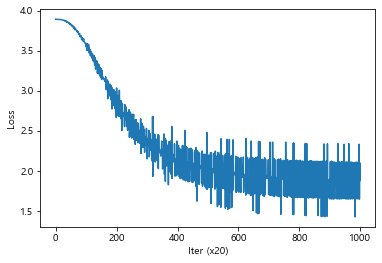

you [-0.00104621  0.00286192 -0.00506056  0.00966945  0.00632096]
say [ 1.1068559   1.130474   -0.06370024 -0.92877305  1.116151  ]
goodbye [-0.92205966  0.5165856   1.0196652   1.0280545  -0.95560485]
and [ 0.8639906   0.97415835 -1.1821637   1.0555245   0.8745604 ]
i [-0.93769866  0.5110335   1.0253083   1.0187836  -0.929884  ]
hello [-1.1245518  -1.034616   -0.3438436  -0.48079005 -1.1368673 ]
. [ 0.00010752 -0.0111747   0.00819237  0.01233914 -0.00890387]


In [2]:
import sys
sys.path.append('..')  
from common.trainer import Trainer
from common.optimizer import Adam
from common.util import preprocess, create_contexts_target, convert_one_hot
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')

window_size = 1
hidden_size = 5
batch_size = 3
max_epoch = 1000

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

vocab_size = len(word_to_id)
contexts, target = create_contexts_target(corpus, window_size)
target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)

model = SimpleSkipGram(vocab_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

trainer.fit(contexts, target, max_epoch, batch_size)
trainer.plot()

word_vecs = model.word_vecs
for word_id, word in id_to_word.items():
    print(word, word_vecs[word_id])